<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seaborn
* Built on top of matplotlib
* Works extremely well with pandas
* Also avoids complexity of Matplotlib
* **Scatterplots** for relationships between 2 quantitative variables
* **Countplot** To count instances of categprical variable categories

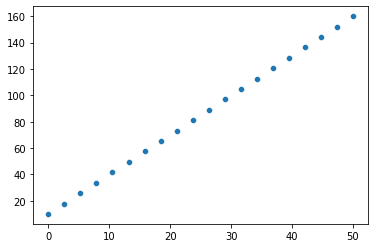

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
height=np.linspace(0,50,20)
weight=3*height+np.random.randint(1,12)
sns.scatterplot(x=height,y=weight)

In [ ]:
# Get all the datasets
countries=pd.read_csv('https://assets.datacamp.com/production/repositories/3996/datasets/cd320cdd281edc2d2ce24058565d3d7090aa9708/countries-of-the-world.csv')
mileage=pd.read_csv('https://assets.datacamp.com/production/repositories/3996/datasets/e0b285b89bdbfbbe8d81123e64727ff150d544e0/mpg.csv')
students=pd.read_csv('https://assets.datacamp.com/production/repositories/3996/datasets/61e08004fef1a1b02b62620e3cd2533834239c90/student-alcohol-consumption.csv')
survey=pd.read_csv('https://assets.datacamp.com/production/repositories/3996/datasets/ab13162732ae9ca1a9a27e2efd3da923ed6a4e7b/young-people-survey-responses.csv')

### Seaborn and pandas
* Seaborn works really well with pandas
* However the data frame has to be tidy.
  * Tidy menas each dataframe observation has its own row and each feature has its own column.

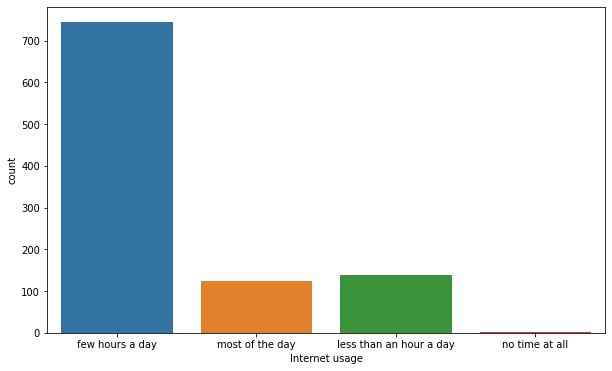

In [ ]:
# Countplot with pandas
fig,ax=plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
sns.countplot(x='Internet usage',data=survey)
plt.show()

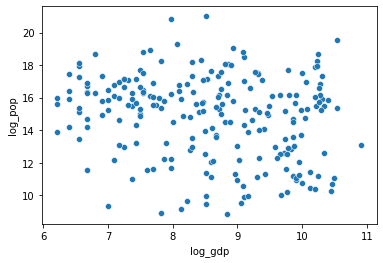

In [ ]:
# scatterplot using hue and pallette
import numpy as np
countries['log_pop']=np.log(countries.Population)
countries['log_gdp']=np.log(countries['GDP ($ per capita)'])
sns.scatterplot(x='log_gdp',y='log_pop',data=countries)

In [ ]:
countries['Birthrate']=countries['Birthrate'].str.replace(',','.')
countries['Birthrate']=countries['Birthrate'].astype('float')

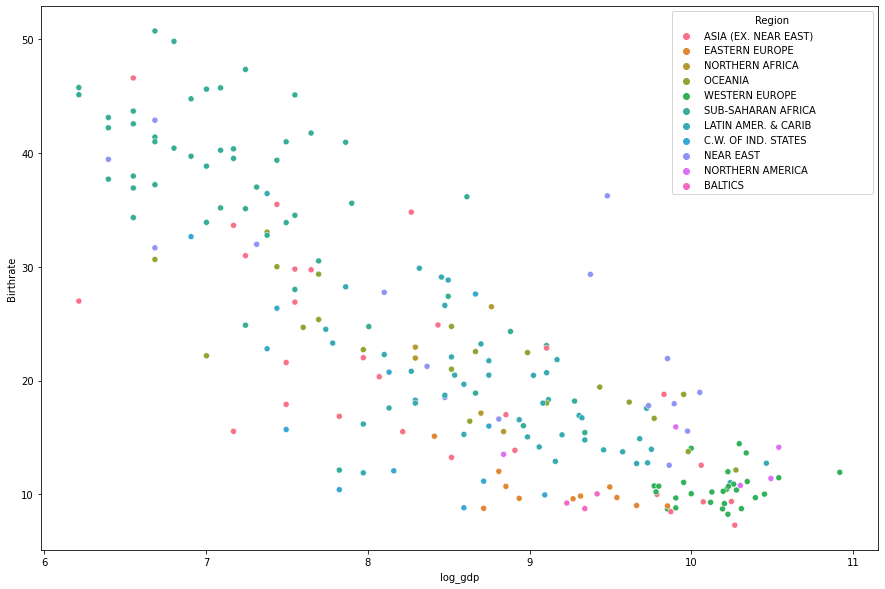

In [ ]:
fig,ax=plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
sns.scatterplot(x='log_gdp',y='Birthrate',hue='Region',data=countries)

### Relplot

> Another way to show the relationship between 2 variables across different groups as defined in another column in the dataframe is to do subplots for each group. You can achieve this using the **relplot** in seaborn

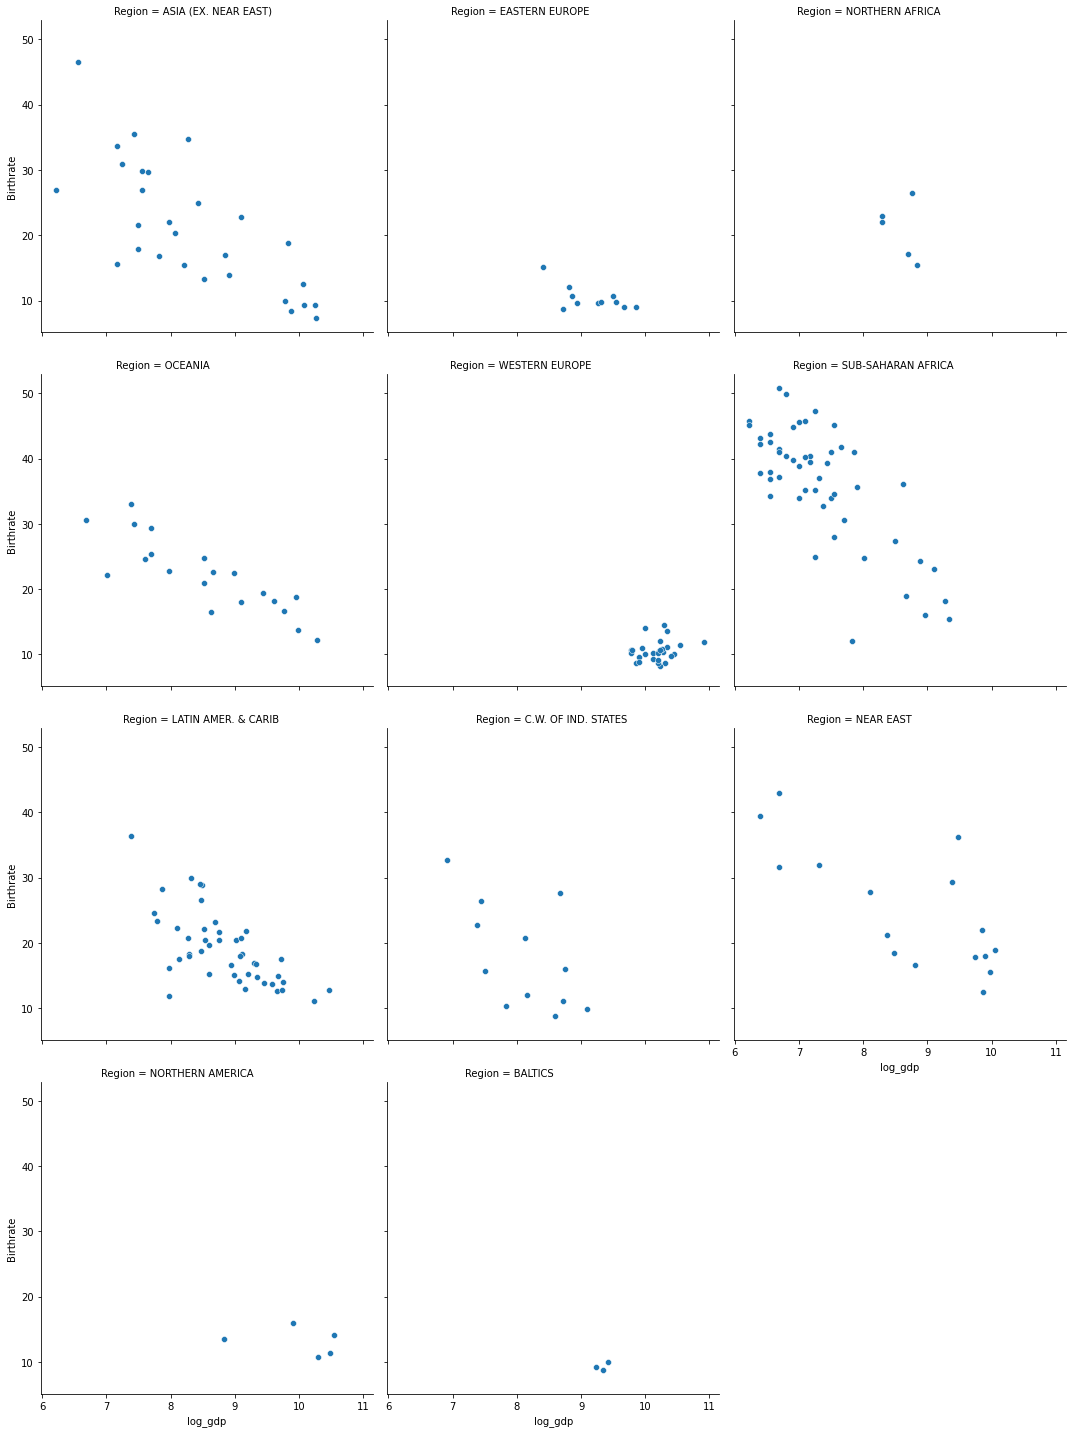

In [ ]:
#Using rel plot and columns for the above scatter
sns.relplot(x='log_gdp',y='Birthrate',data=countries,col='Region',col_wrap=3,kind='scatter')

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})

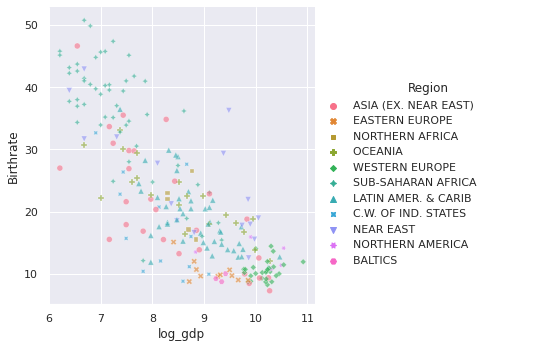

In [ ]:
# Relplot with style,size,hue parameters
sns.relplot(x='log_gdp',y='Birthrate',data=countries,hue='Region',kind='scatter',style='Region',alpha=0.6)

### Line Plot
* Line plots typically used to track the value of a particular thing over time. (*timeseries data*)
* sns.set_context('paper'/'notebook'/'talk'/'poster')

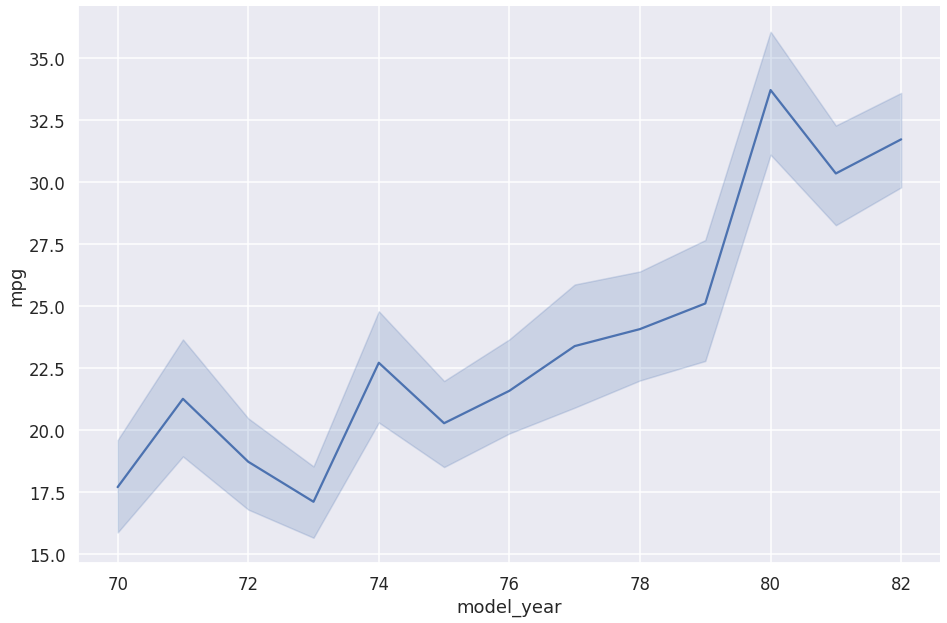

In [ ]:
sns.set_context('talk')
sns.relplot(x='model_year',y='mpg',data=mileage,kind='line',height=9,aspect=1.5)
plt.show()

### Countplots and barplots
* Categorical plots
* Typically one axis is a small number of categories
* catplot() - Categorical verion of relplot. Can use col and rows to divide the categorical plot.

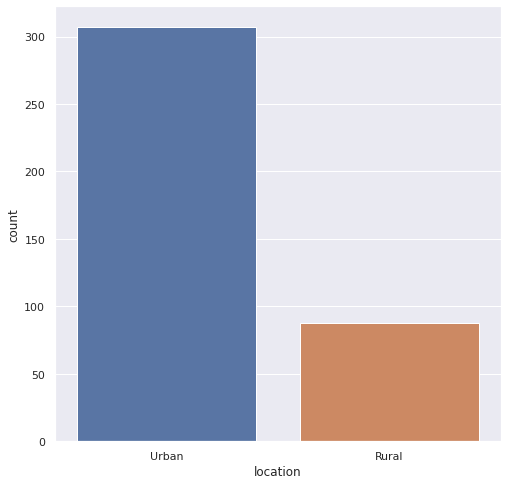

In [ ]:
sns.set_context('notebook')
sns.set({'figure.figsize':(8,8)})
sns.countplot(x='location',data=students)

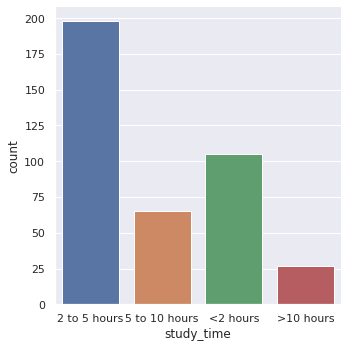

In [ ]:
# Using catplot
sns.catplot(x='study_time',data=students,kind='count')

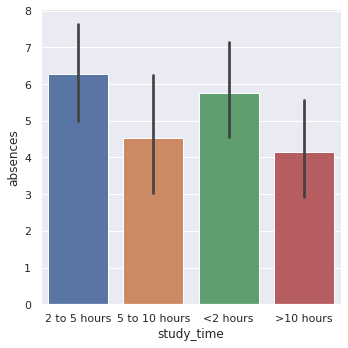

In [ ]:
# Using catplot bar plot
sns.set({'figure.figsize':(10,7)})
sns.catplot(x='study_time',y='absences',kind='bar',data=students)

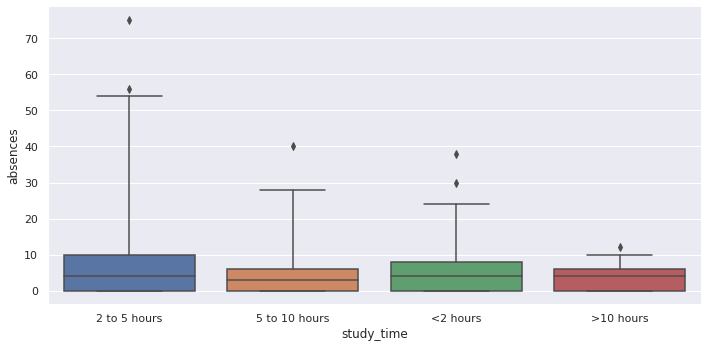

In [ ]:
# Creating a box plot using catplot

sns.catplot(x='study_time',y='absences',kind='box',data=students,height=5,aspect=2,whis=[0,99])

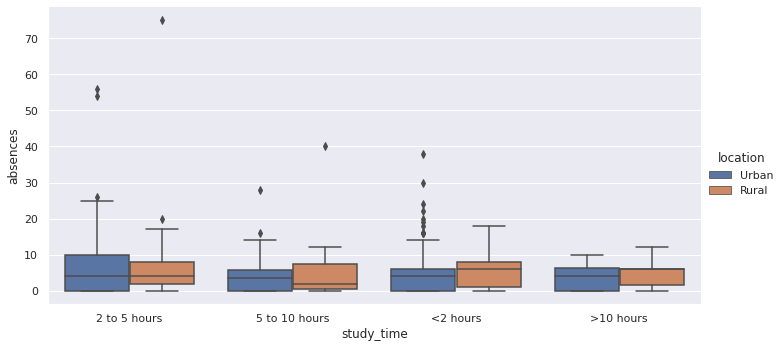

In [ ]:
#creating a box plot with hue
sns.catplot(data=students,x='study_time',y='absences',kind='box',hue='location',height=5,aspect=2)
plt.show()

### Pointplots
* Show the mean of a quantitative variable plotted as a single point broken out by categories
* Vertical bars around the point show the confidence interval for the mean
* You can change the sestimator from mean to median
* Can in some cases look cleaner than a point plot

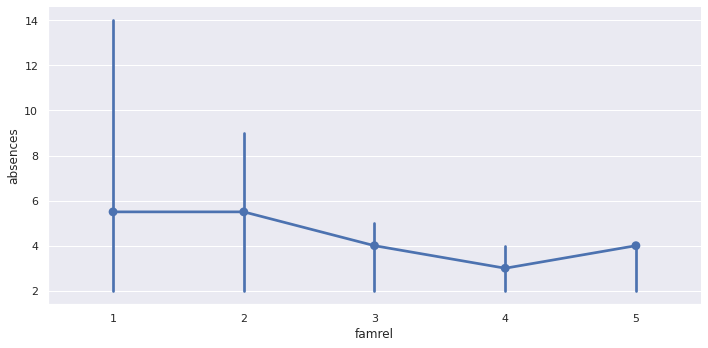

In [ ]:
# Adding a point plot with median as the estimator
sns.catplot(data=students,x='famrel',y='absences',kind='point',estimator=np.median,height=5,aspect=2)

### Customizing Seaborn plots
* Changing style might make it easier for an audience to read plots
* Help orient the audience more quickly to the data
  * white
  * whitegrid
  * darkgrid
  * ticks
* You can use sns.set_style('')
* You can also set palettes
  * Sequential Palettes (Use for continous)
  * Diverging Palettes
* Set scales sns.set_context() helps set the scale of the labels
  * paper
  * notebook
  * talk
  * Poster


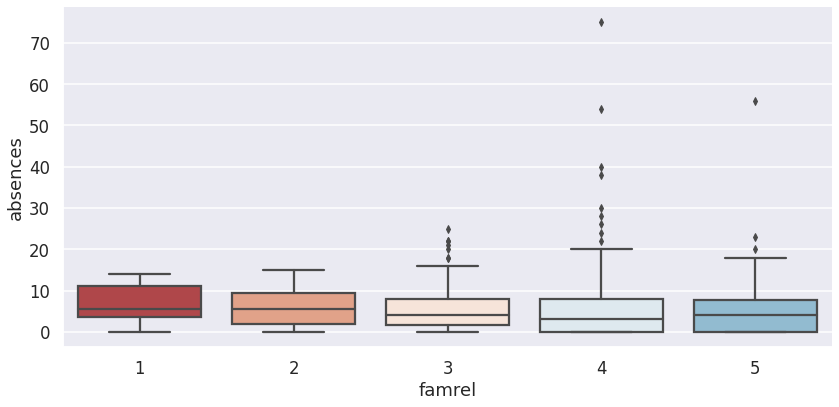

In [ ]:
# Using context and palettes
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('RdBu')
sns.catplot(data=students,x='famrel',y='absences',kind='box',height=6,aspect=2)

### Modifying plots
* Seaborn plots create 2 types of objects
  * *Facet grids* relplot() and catplot() are facetgrid plots
  * *Axes subplots* scatterplot() and countplot() are axessubplots

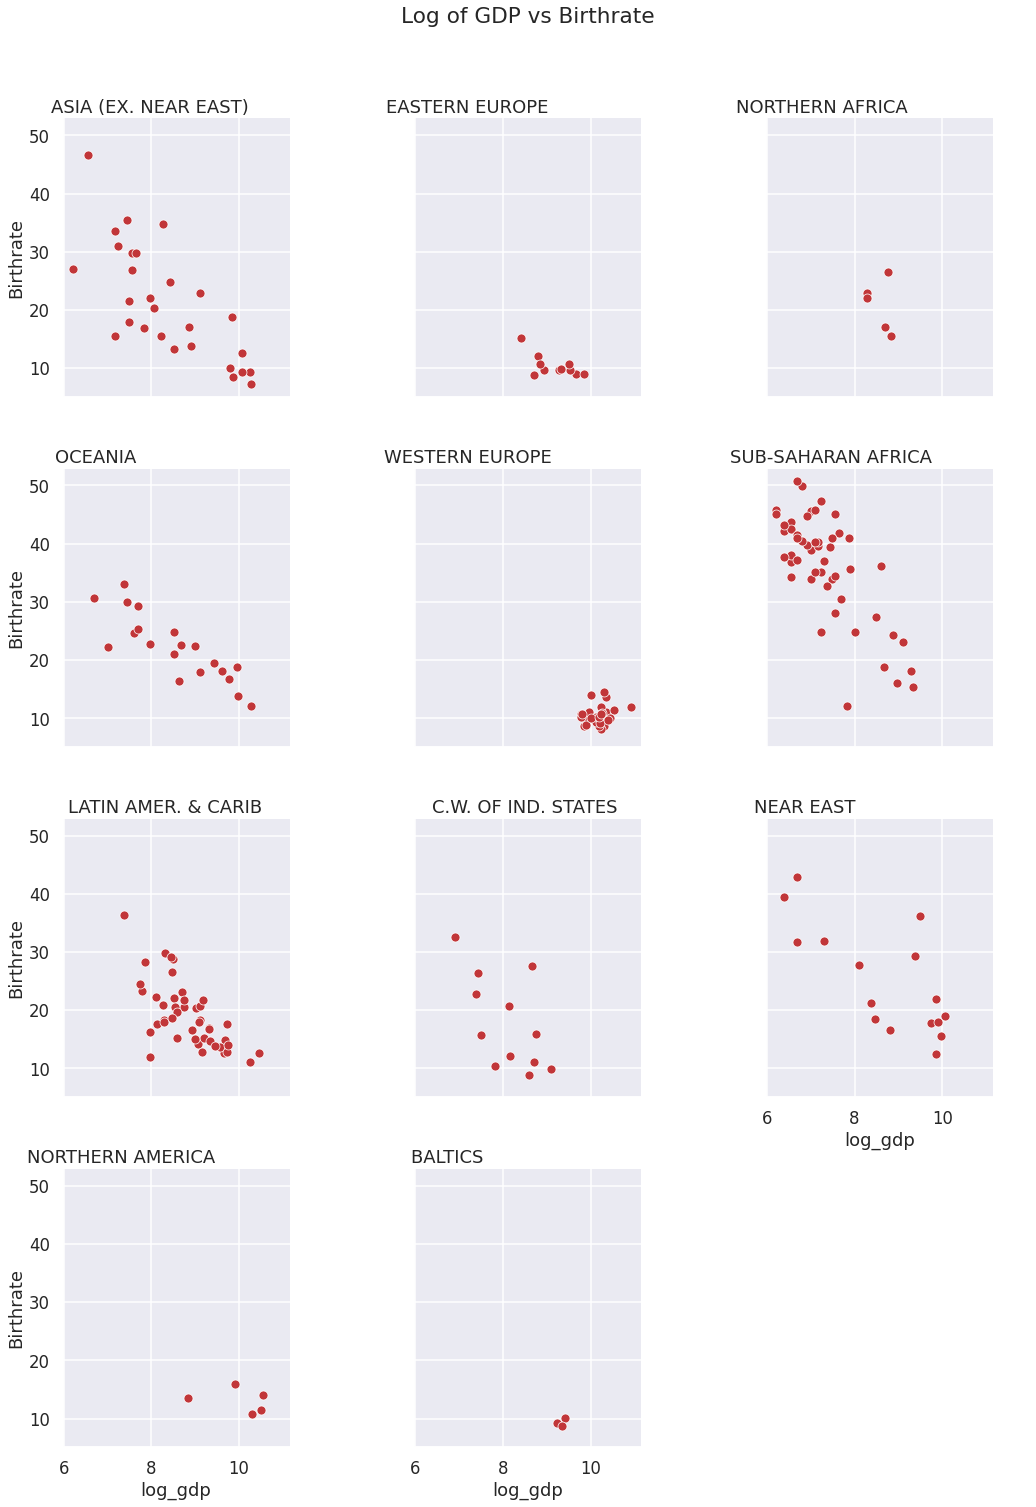

In [ ]:
# Using seaborn methods to modify facetgrid plots
g=sns.relplot(data=countries,x='log_gdp',y='Birthrate',col='Region',col_wrap=3)
g.fig.suptitle('Log of GDP vs Birthrate',y=1.05)
g.set_titles('{col_name}')

(array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 8 Text major ticklabel objects>)

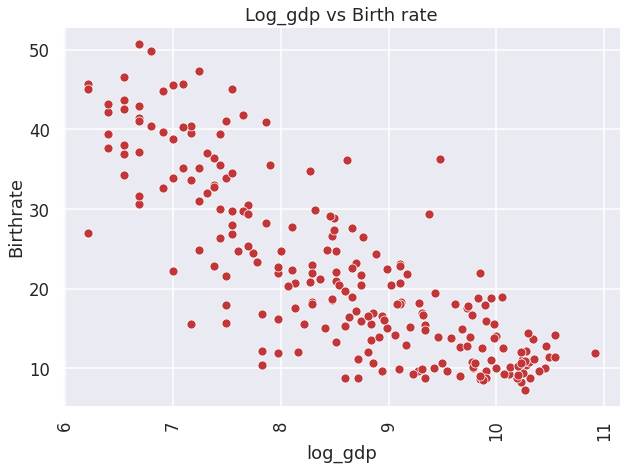

In [ ]:
# Matplotlib methods work 
fig,ax=plt.subplots()
sns.scatterplot(data=countries,x='log_gdp',y='Birthrate')
ax.set_title('Log_gdp vs Birth rate')
plt.xticks(rotation=90)

In [ ]:
countries.Region.value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64